In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data_info=pd.read_csv("info.txt",sep=" - ")
pd.set_option("max_colwidth", None)
data_info

C:\Users\91984\anaconda3\envs\telecom_customer_churn\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,customerID,customer id
0,genader,client gender (male / female)
1,SeniorCitizen,"is the client retired (1, 0)"
2,Partner,"is the client married (Yes, No)"
3,tenure,how many months a person has been a client of the company
4,PhoneService,"is the telephone service connected (Yes, No)"
5,MultipleLines,"are multiple phone lines connected (Yes, No, No phone service)"
6,InternetService,"client's Internet service provider (DSL, Fiber optic, No)"
7,OnlineSecurity,"is the online security service connected (Yes, No, No internet service)"
8,OnlineBackup,"is the online backup service activated (Yes, No, No internet service)"
9,DeviceProtection,"does the client have equipment insurance (Yes, No, No internet service)"


In [3]:
data=pd.read_csv("telecom_users.csv")
pd.set_option("max_columns",None)
X_data=data.iloc[:,2:-1]
Y_data=data.iloc[:,-1]

In [4]:
X_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [5]:
Y_data=Y_data.to_frame()
Y_data

,Churn
0,No
1,No
2,Yes
3,No
4,No
...,...
5981,Yes
5982,No
5983,No
5984,Yes


In [6]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [7]:
X_data['TotalCharges']=pd.to_numeric(X_data['TotalCharges'], errors='coerce')
X_data["SeniorCitizen"]=X_data["SeniorCitizen"].astype(str)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [8]:
X_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [9]:
missing=list(X_data[X_data["TotalCharges"].isnull()].index)
missing
X_data=X_data.dropna()
X_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [10]:
Y_data=Y_data.drop(missing)
print( X_data.shape, Y_data.shape)

(5976, 19) (5976, 1)


In [11]:
Y_data.describe()

,Churn
count,5976
unique,2
top,No
freq,4389


<AxesSubplot:xlabel='Churn', ylabel='count'>

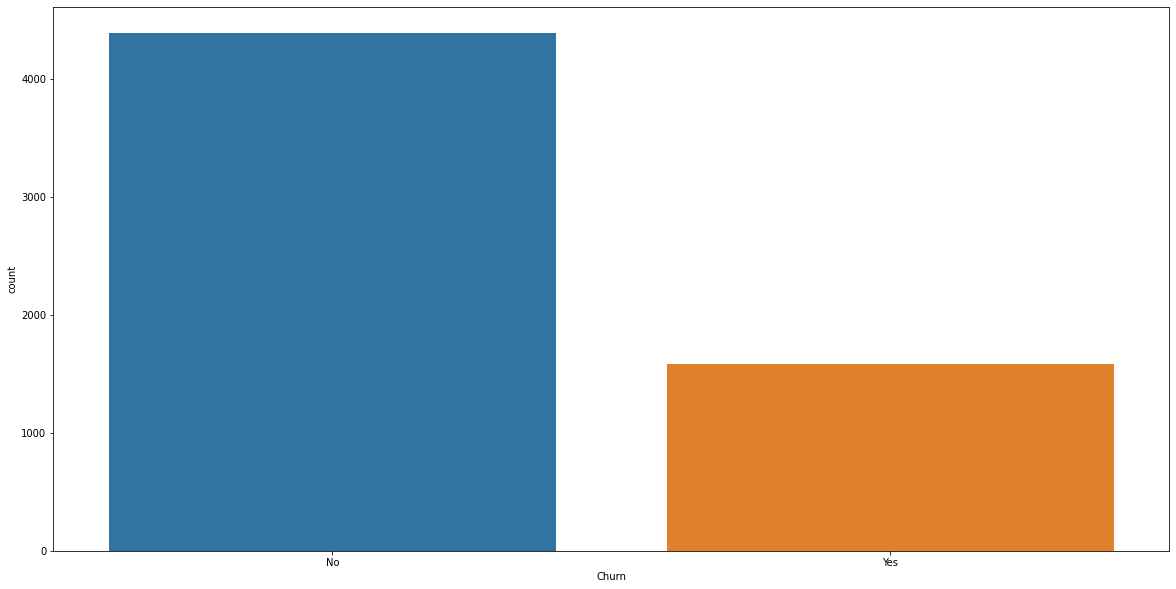

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x="Churn", data=Y_data)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.25,random_state=10, stratify=Y_data)

In [14]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4482, 19) (4482, 1)
Test (1494, 19) (1494, 1)


       Churn
count   4482
unique     2
top       No
freq    3292


<AxesSubplot:xlabel='Churn', ylabel='count'>

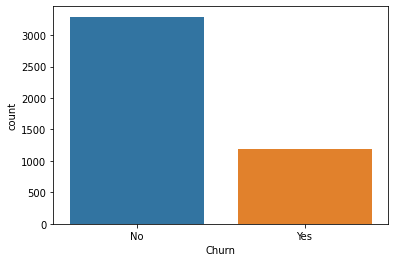

In [15]:
print(y_train.describe())
sns.countplot(x="Churn", data=y_train)

       Churn
count   1494
unique     2
top       No
freq    1097


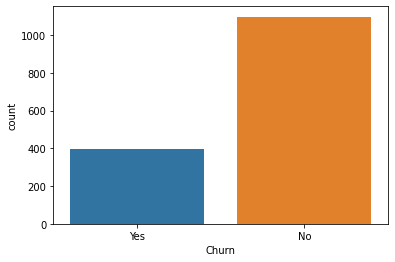

In [16]:
sns.countplot(x="Churn",data=y_test)
print(y_test.describe())

In [17]:
X_train = pd.get_dummies(X_train, columns=list(X_train.dtypes[X_train.dtypes == object].index),drop_first=True)
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3332,2,100.20,198.50,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4074,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3235,9,100.50,918.60,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
4156,28,54.40,1516.60,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
3907,71,19.85,1326.35,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,11,53.80,651.55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5068,72,48.90,3527.00,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4708,69,23.95,1713.10,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
788,20,39.40,825.40,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0


In [18]:
X_test = pd.get_dummies(X_test, columns=list(X_test.dtypes[X_test.dtypes == object].index),drop_first=True)
X_test

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
52,1,100.80,100.80,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
43,4,45.30,196.95,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2276,38,101.15,3956.70,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
1255,50,95.70,4729.75,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2396,13,84.05,1095.30,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,10,79.25,793.55,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
986,70,98.70,6858.90,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0
5081,65,110.80,7245.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0
2371,22,100.75,2095.00,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [19]:
num_cols = list(X_train.select_dtypes(include=['int64',"float"]).columns)
num_cols
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3332,-1.235638,1.173445,-0.921397,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4074,0.068314,-0.265591,-0.176798,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3235,-0.950398,1.183426,-0.604315,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
4156,-0.176177,-0.350436,-0.340997,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
3907,1.576008,-1.500002,-0.424770,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,-0.868901,-0.370400,-0.721905,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5068,1.616757,-0.533435,0.544244,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4708,1.494511,-1.363584,-0.254472,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
788,-0.502165,-0.849524,-0.645354,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0


In [20]:
X_test[num_cols] = sc.transform(X_test[num_cols])
X_test

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
52,-1.276386,1.193408,-0.964418,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
43,-1.154141,-0.653216,-0.922080,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2276,0.231308,1.205054,0.733454,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
1255,0.720290,1.023718,1.073852,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2396,-0.787404,0.636094,-0.526509,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,-0.909650,0.476386,-0.659378,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
986,1.535260,1.123536,2.011382,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0
5081,1.331518,1.526133,2.181790,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0
2371,-0.420668,1.191745,-0.086310,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [21]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

C:\Users\91984\anaconda3\envs\telecom_customer_churn\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 1, ..., 0, 0, 0])

In [22]:
y_test = le.transform(y_test)
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [23]:
X_corr=X_train[num_cols].corr()
X_corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.259675,0.830454
MonthlyCharges,0.259675,1.000000,0.653663
TotalCharges,0.830454,0.653663,1.000000


<AxesSubplot:>

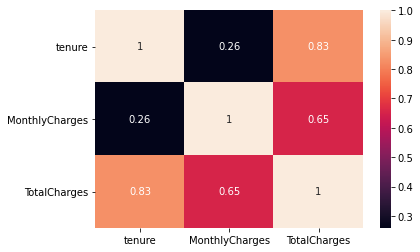

In [24]:
sns.heatmap(X_corr, annot=True)

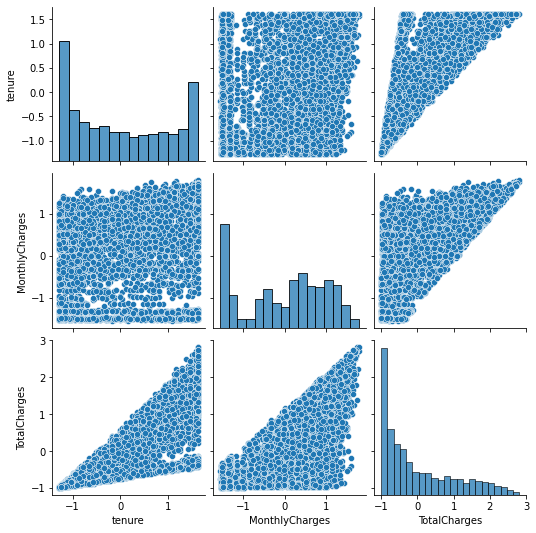

In [25]:
sns.pairplot(X_train[num_cols])

In [26]:
classifer_model = Sequential()
classifer_model.add(Dense(20, kernel_initializer = 'he_uniform',activation='relu',input_dim = 30))
classifer_model.add(Dense(10, kernel_initializer = 'he_uniform',activation='relu'))
classifer_model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifer_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model=classifer_model.fit(X_train, y_train, batch_size = 100,validation_split=0.33, epochs = 100,verbose=2)

Epoch 1/100
31/31 - 2s - loss: 0.6417 - accuracy: 0.6426 - val_loss: 0.5637 - val_accuracy: 0.7453
Epoch 2/100
31/31 - 0s - loss: 0.5486 - accuracy: 0.7428 - val_loss: 0.5040 - val_accuracy: 0.7588
Epoch 3/100
31/31 - 0s - loss: 0.4952 - accuracy: 0.7652 - val_loss: 0.4589 - val_accuracy: 0.7750
Epoch 4/100
31/31 - 0s - loss: 0.4670 - accuracy: 0.7841 - val_loss: 0.4423 - val_accuracy: 0.7736
Epoch 5/100
31/31 - 0s - loss: 0.4544 - accuracy: 0.7925 - val_loss: 0.4371 - val_accuracy: 0.7709
Epoch 6/100
31/31 - 0s - loss: 0.4478 - accuracy: 0.7908 - val_loss: 0.4313 - val_accuracy: 0.7791
Epoch 7/100
31/31 - 0s - loss: 0.4450 - accuracy: 0.7948 - val_loss: 0.4317 - val_accuracy: 0.7831
Epoch 8/100
31/31 - 0s - loss: 0.4410 - accuracy: 0.7958 - val_loss: 0.4301 - val_accuracy: 0.7770
Epoch 9/100
31/31 - 0s - loss: 0.4388 - accuracy: 0.7995 - val_loss: 0.4275 - val_accuracy: 0.7818
Epoch 10/100
31/31 - 0s - loss: 0.4363 - accuracy: 0.8011 - val_loss: 0.4296 - val_accuracy: 0.7824
Epoch 11/

31/31 - 0s - loss: 0.4032 - accuracy: 0.8138 - val_loss: 0.4251 - val_accuracy: 0.7953
Epoch 84/100
31/31 - 0s - loss: 0.4015 - accuracy: 0.8118 - val_loss: 0.4264 - val_accuracy: 0.7973
Epoch 85/100
31/31 - 0s - loss: 0.4005 - accuracy: 0.8135 - val_loss: 0.4258 - val_accuracy: 0.7980
Epoch 86/100
31/31 - 0s - loss: 0.4010 - accuracy: 0.8141 - val_loss: 0.4282 - val_accuracy: 0.7926
Epoch 87/100
31/31 - 0s - loss: 0.4043 - accuracy: 0.8078 - val_loss: 0.4262 - val_accuracy: 0.7953
Epoch 88/100
31/31 - 0s - loss: 0.4036 - accuracy: 0.8128 - val_loss: 0.4240 - val_accuracy: 0.7973
Epoch 89/100
31/31 - 0s - loss: 0.4025 - accuracy: 0.8125 - val_loss: 0.4300 - val_accuracy: 0.7939
Epoch 90/100
31/31 - 0s - loss: 0.4039 - accuracy: 0.8121 - val_loss: 0.4250 - val_accuracy: 0.7980
Epoch 91/100
31/31 - 0s - loss: 0.3993 - accuracy: 0.8155 - val_loss: 0.4295 - val_accuracy: 0.7946
Epoch 92/100
31/31 - 0s - loss: 0.3988 - accuracy: 0.8148 - val_loss: 0.4256 - val_accuracy: 0.7966
Epoch 93/100


In [27]:
classifer_model.evaluate(X_test, y_test, verbose=1)

47/47 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8159


[0.40141159296035767, 0.8159303665161133]

In [28]:
loss, accuracy = classifer_model.evaluate(X_test, y_test, verbose=2)
print('loss: %.2f' % (loss*100),'Accuracy: %.2f' % (accuracy*100))

47/47 - 0s - loss: 0.4014 - accuracy: 0.8159
loss: 40.14 Accuracy: 81.59


In [29]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


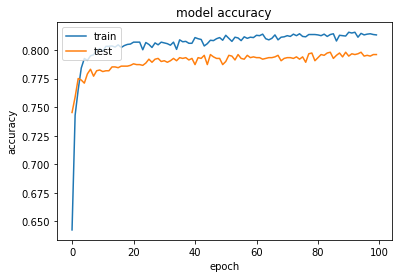

In [30]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

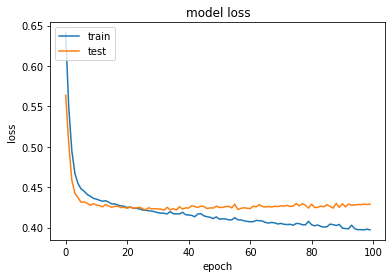

In [31]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
y_pred = classifer_model.predict_classes(X_test)
y_pred

C:\Users\91984\anaconda3\envs\telecom_customer_churn\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[997, 100],
       [175, 222]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1097
           1       0.69      0.56      0.62       397

    accuracy                           0.82      1494
   macro avg       0.77      0.73      0.75      1494
weighted avg       0.81      0.82      0.81      1494



In [35]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8159303882195449

In [36]:
model_json = classifer_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
classifer_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
